In [3]:
#impoting libraries
import os
import sys
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import re
import glob
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tensorflow.keras.models import Sequential
get_ipython().magic('matplotlib inline')
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Dense, Convolution2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D, Dropout, Flatten, Reshape, Activation

from sklearn.metrics import log_loss
from tensorflow.keras.models import Model
import csv
from tensorflow.keras import backend as K
from imgaug import augmenters as iaa
import imgaug as ia

In [4]:
# The function below will sort the files in numberical order 
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [5]:
img_path = sorted(glob.glob('/home/mchou001/train/**/*.png'), key = numericalSort)

In [7]:
classes = pd.read_csv("labels.csv")

In [8]:
labels = classes['labels']

In [17]:
labels.value_counts()

Label-Chapters                       70717
Label-Appendices                      9885
Label-Other                           3447
Label-ReferenceList                   3357
Label-TableofContent                  1112
Label-TitlePage                        910
Label-Abstract                         777
Label-ListofFigures                    586
Label-Acknowledgement                  504
Label-ListofTables                     477
Label-CurriculumVitae                  123
Label-Dedication                        76
Label-ChapterAbstract                   67
Label-DedicationOrAcknowledgement       39
Label-GeneralAbstract                    4
Label-CasesReferenced                    3
Name: labels, dtype: int64

In [18]:
img_path_label_map = list(zip(img_path, labels))

In [19]:
df = pd.DataFrame(img_path_label_map, columns = ['filename', 'labels'])
df.to_csv('train.csv', encoding = 'utf-8', index= None)

In [20]:
train = pd.read_csv("train.csv")

In [21]:
train.head()

,filename,labels
0,/home/mchou001/train/1/1.png,Label-TitlePage
1,/home/mchou001/train/1/2.png,Label-Dedication
2,/home/mchou001/train/1/3.png,Label-Abstract
3,/home/mchou001/train/1/4.png,Label-Acknowledgement
4,/home/mchou001/train/1/5.png,Label-TableofContent


In [22]:
train.set_index("labels", inplace = True)

### Dedication

In [23]:
label_dedication = train.loc["Label-Dedication"]

In [24]:
label_dedication

,filename
labels,
Label-Dedication,/home/mchou001/train/1/2.png
Label-Dedication,/home/mchou001/train/7/4.png
Label-Dedication,/home/mchou001/train/40/6.png


In [89]:
from PIL import Image

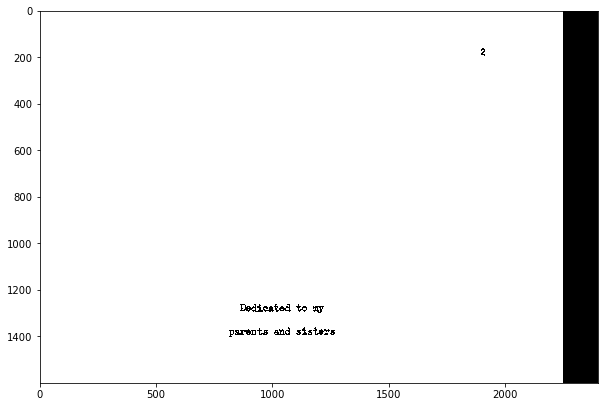

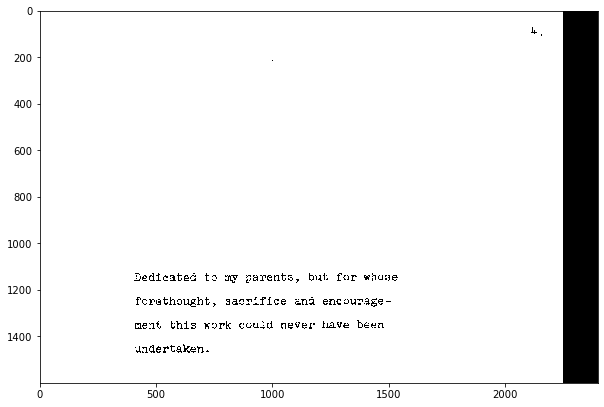

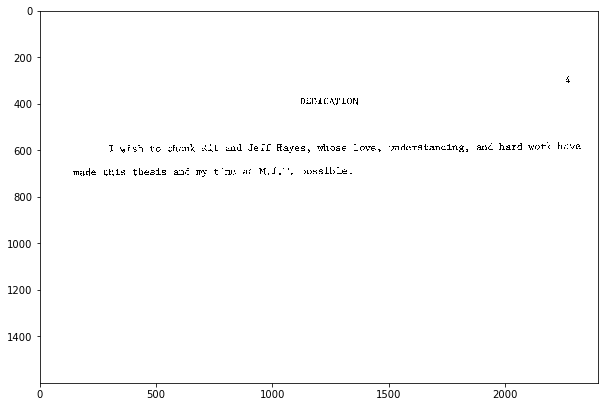

In [90]:
img_crop = []
for i in range(len(label_dedication)):
    im = Image.open(label_dedication['filename'][i])
    im_crop = im.crop((300, 0, 2700, 1600))
    im_arr = np.array(im_crop)
    img_crop.append(im_arr)

    plt.figure(figsize=(10, 20))
    plt.imshow(im_crop)
    plt.show()

In [91]:
img_generator = ImageDataGenerator(
    vertical_flip=True,         # vertical transposition
    horizontal_flip=True,       # horizontal transposition
    height_shift_range=0.1,     # shift the height of the image 30%
    width_shift_range=0.1,      # shift the width of the image 30%
    brightness_range=[0.1, 0.5], # specify the range in which to decrease/increase brightness
    preprocessing_function=preprocess_input # VGG16 preprocessing
)
## see if i can change the line space
#latex file for orientatioin -- check sampanna's paper (technical side)

In [61]:
dedication_img = np.array(img_crop)
dedication_img = dedication_img/255 #normalizing between 0 and 1

In [62]:
os.makedirs('Label-Dedication')

In [63]:
batch_img = img_generator.flow(dedication_img, batch_size = 9, save_to_dir='Label-Dedication', save_prefix='aug', save_format='png')

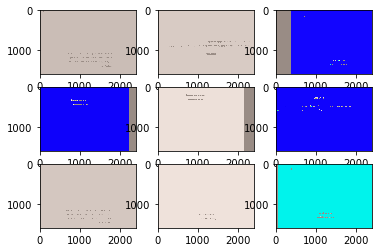

In [64]:
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = batch_img.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image, cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

### Acknowledgement

In [65]:
label_ack = train.loc["Label-Acknowledgement"]
label_ack

,filename
labels,
Label-Acknowledgement,/home/mchou001/train/1/4.png
Label-Acknowledgement,/home/mchou001/train/2/3.png
Label-Acknowledgement,/home/mchou001/train/40/3.png


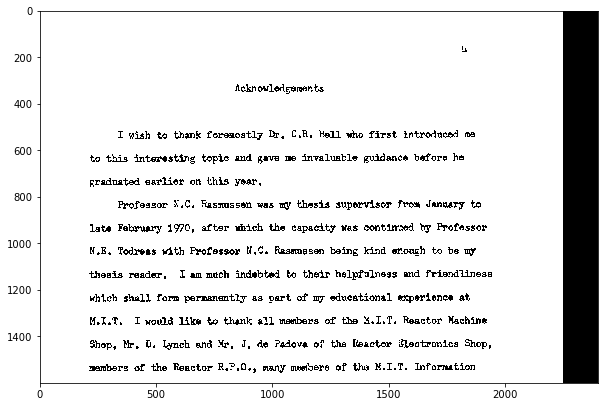

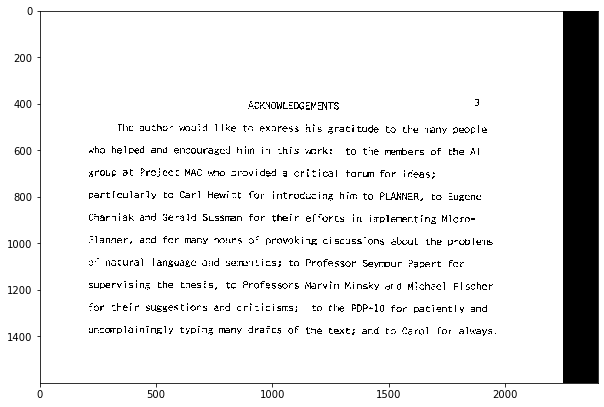

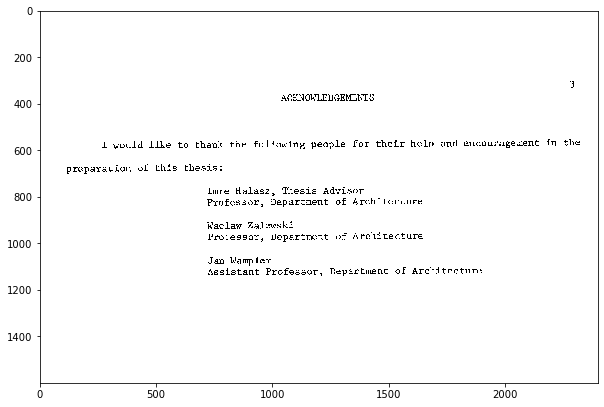

In [66]:
img_crop = []
for i in range(len(label_ack)):
    im = Image.open(label_ack['filename'][i])
    im_crop = im.crop((300, 0, 2700, 1600)) #left, top, right, and bottom
    im_arr = np.array(im_crop)
    img_crop.append(im_arr)

    plt.figure(figsize=(10, 20))
    plt.imshow(im_crop)
    plt.show()

In [67]:
ack_img = np.array(img_crop)
ack_img = ack_img/255

In [68]:
os.makedirs('Label-Acknowledgement')

In [69]:
batch_img = img_generator.flow(ack_img, batch_size = 9, save_to_dir='Label-Acknowledgement', save_prefix='aug', save_format='png')

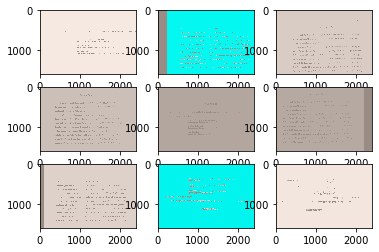

In [70]:
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = batch_img.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image, cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

### General Abstract

In [71]:
label_generalabs = train.loc["Label-GeneralAbstract"]
label_generalabs

,filename
labels,
Label-GeneralAbstract,/home/mchou001/train/18/17.png
Label-GeneralAbstract,/home/mchou001/train/18/18.png
Label-GeneralAbstract,/home/mchou001/train/18/19.png
Label-GeneralAbstract,/home/mchou001/train/18/20.png


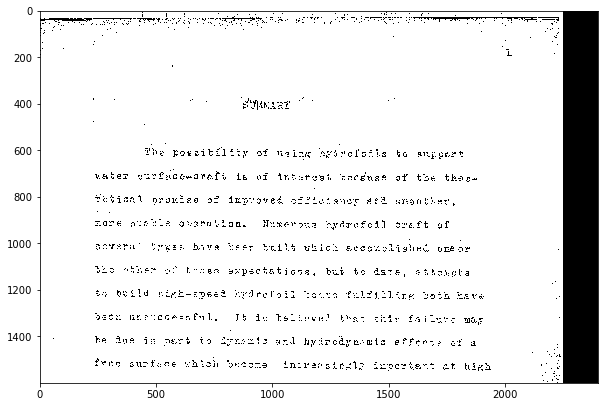

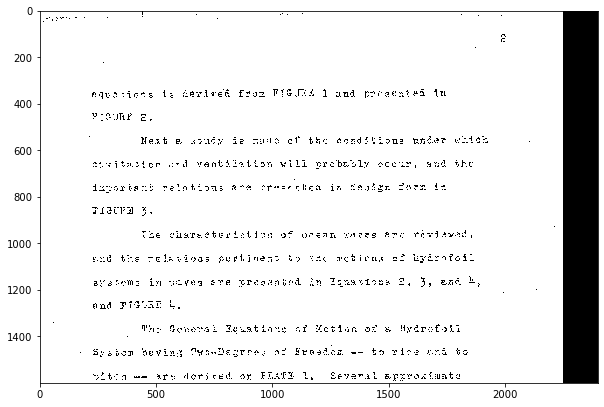

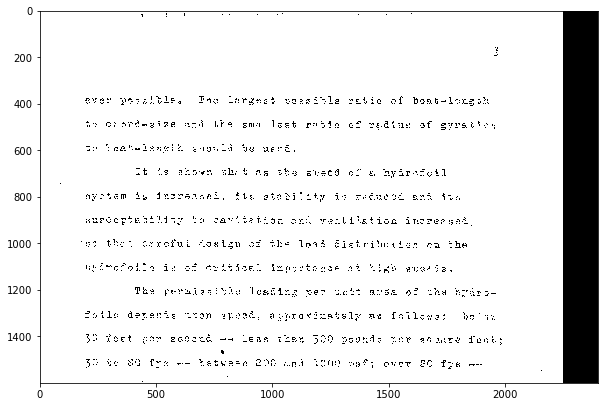

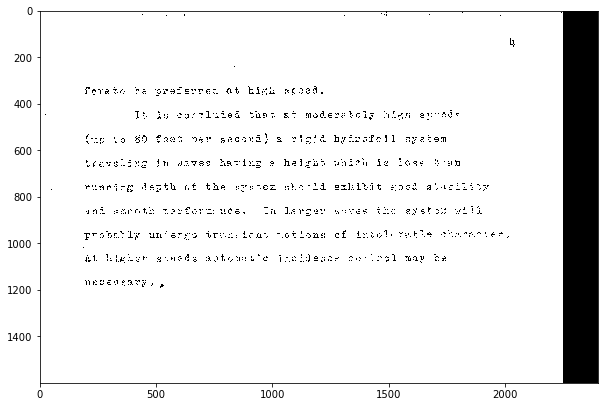

In [73]:
img_crop = []
for i in range(len(label_generalabs)):
    im = Image.open(label_generalabs['filename'][i])
    im_crop = im.crop((300, 0, 2700, 1600)) #left, top, right, and bottom
    im_arr = np.array(im_crop)
    img_crop.append(im_arr)

    plt.figure(figsize=(10, 20))
    plt.imshow(im_crop)
    plt.show()

In [82]:
gbs_img_generator = ImageDataGenerator( ##image data generator for general abstract
    vertical_flip=True,         # vertical transposition
    horizontal_flip=True,       # horizontal transposition
    height_shift_range=0.2,     # shift the height of the image 30%
    width_shift_range=0.2,      # shift the width of the image 30%
    brightness_range=[0.2, 0.6], # specify the range in which to decrease/increase brightness
    preprocessing_function=preprocess_input # VGG16 preprocessing
)

In [83]:
gbs_img = np.array(img_crop)
gbs_img = gbs_img/255

In [84]:
os.makedirs('Label-GeneralAbstract')

In [85]:
batch_img = gbs_img_generator.flow(gbs_img, batch_size = 9, save_to_dir='Label-GeneralAbstract', save_prefix='aug', save_format='png')

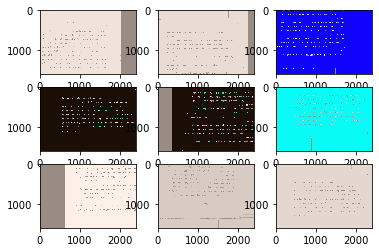

In [86]:
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = batch_img.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image, cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

## Table of Content

In [16]:
label_toc = train.loc["Label-TableofContent"]
label_toc

,filename
labels,
Label-TableofContent,/home/mchou001/train/1/5.png
Label-TableofContent,/home/mchou001/train/1/6.png
Label-TableofContent,/home/mchou001/train/2/4.png
Label-TableofContent,/home/mchou001/train/2/5.png
Label-TableofContent,/home/mchou001/train/2/6.png
...,...
Label-TableofContent,/home/mchou001/train/38/4.png
Label-TableofContent,/home/mchou001/train/38/5.png
Label-TableofContent,/home/mchou001/train/38/6.png


In [ ]:
img_crop = []
for i in range(len(label_generalabs)):
    im = Image.open(label_generalabs['filename'][i])
    im_crop = im.crop((300, 0, 2700, 1600)) #left, top, right, and bottom
    im_arr = np.array(im_crop)
    img_crop.append(im_arr)

    plt.figure(figsize=(10, 20))
    plt.imshow(im_crop)
    plt.show()

## Curriculum Vitae

In [16]:
label_cv = train.loc['Label-CurriculumVitae']
label_cv

KeyError: 'Label-CurriculumVitae'

## ListOfTables

In [24]:
label_lot = train.loc['Label-ListofTables']
label_lot

,filename
labels,
Label-ListofTables,/home/mchou001/train/1/9.png
Label-ListofTables,/home/mchou001/train/4/5.png
Label-ListofTables,/home/mchou001/train/17/15.png
Label-ListofTables,/home/mchou001/train/22/8.png
Label-ListofTables,/home/mchou001/train/25/32.png
...,...
Label-ListofTables,/home/mchou001/train/34/12.png
Label-ListofTables,/home/mchou001/train/34/13.png
Label-ListofTables,/home/mchou001/train/34/14.png


In [56]:
##image augmentation
seq = iaa.Sequential([
    iaa.Affine(rotate=(-6, 6)),
    iaa.AdditiveGaussianNoise(scale=(10, 50)),
    iaa.SaltAndPepper(p=0.1),
    iaa.GaussianBlur(sigma=0.5),
    iaa.LinearContrast(alpha=1),
    iaa.PerspectiveTransform(scale=0.025, keep_size=True)
], random_order = True)

In [57]:
for i in range(len(label_toc)):
        images = label_toc['filename'][i]
        aug_image = seq(image=cv2.imread(images))
        cv2.imwrite('/home/mchou001/Label-TableofContent/aug{}.png'.format(i),aug_image)